In [1]:
%matplotlib inline
from c3.Dice import Dice
from c3.Train import Train

In [2]:
dice = Dice([4, 6, 8, 12, 20])
dice.d.T

hypo,4,6,8,12,20
prob,0.2,0.2,0.2,0.2,0.2


In [3]:
dice.update(6)
dice.d.T

hypo,4,6,8,12,20
prob,0.0,0.392157,0.294118,0.196078,0.117647


In [4]:
for roll in [6, 8, 7, 7, 5, 4]:
    dice.update(roll)
dice.d.T

hypo,4,6,8,12,20
prob,0.0,0.0,0.943248,0.055206,0.001545


mean = 333.41989326370776


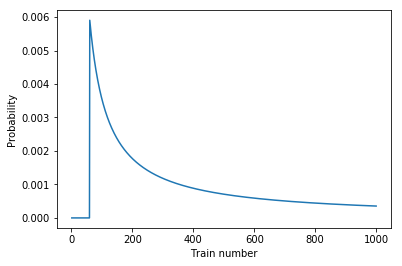

In [5]:
hypos = range(1, 1001)
train = Train(hypos)
train.update(60)
train.plot()
print("mean = {}".format(train.mean()))

In [6]:
for upper_bound in [500, 1000, 2000]:
    train = Train(range(1, upper_bound + 1))
    for data in [60, 30, 90]:
        train.update(data)
    print("upper_bound = {}, mean = {:.2f}".format(upper_bound, train.mean()))

upper_bound = 500, mean = 151.85
upper_bound = 1000, mean = 164.31
upper_bound = 2000, mean = 171.34


mean = 178.54735317971608


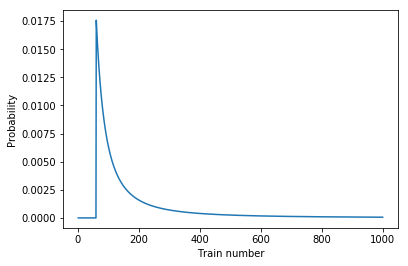

In [7]:
def exp_dist(hypos, alpha=1.0):
    return [hypo ** (-alpha) for hypo in hypos]


train = Train(range(1, 1001), prob_dist=exp_dist)
train.update(60)
train.plot()
print("mean = {}".format(train.mean()))

In [8]:
for upper_bound in [500, 1000, 2000]:
    train = Train(range(1, upper_bound + 1), prob_dist=exp_dist)
    for data in [30, 60, 90]:
        train.update(data)
    print("upper_bound = {}, mean = {:.2f}".format(upper_bound, train.mean()))
conf_5 = train.percentile(5)
conf_95 = train.percentile(95)
print("5% confidence interval = {}\n95% confidence interval = {}".format(conf_5, conf_95))

upper_bound = 500, mean = 130.71
upper_bound = 1000, mean = 133.28
upper_bound = 2000, mean = 134.00
5% confidence interval = 91
95% confidence interval = 243
